In [0]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
import numpy as np
from tensorflow.keras.datasets import imdb
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM




In [0]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
random_index = np.random.permutation(25000)   
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [0]:
model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8, return_sequences=True))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 8)           1312      
_________________________________________________________________
lstm_9 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33,865
Trainable params: 33,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.4431 - accuracy: 0.7975 - val_loss: 0.3855 - val_accuracy: 0.8374
Epoch 2/10
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.3383 - accuracy: 0.8583 - val_loss: 0.3622 - val_accuracy: 0.8450
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.3158 - accuracy: 0.8671 - val_loss: 0.3548 - val_accuracy: 0.8456
Epoch 4/10
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.3001 - accuracy: 0.8734 - val_loss: 0.3535 - val_accuracy: 0.8404
Epoch 5/10
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.2824 - accuracy: 0.8821 - val_loss: 0.3571 - val_accuracy: 0.8418
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.2707 - accuracy: 0.8888 - val_loss: 0.3742 - val_accuracy: 0.8418
Epoch 7/10
20000/20000 [==============================] -

In [0]:
import matplotlib.pyplot as plt

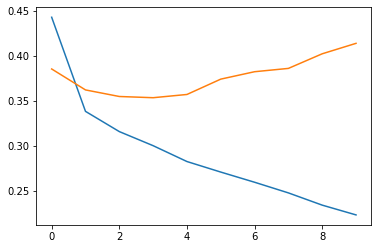

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

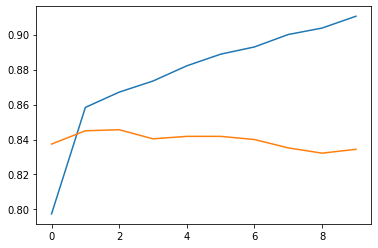

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [0]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8344


2층 LSTM을 만들었지만 정확도가 1%정도만 향상됐습니다. 정확도 향상을 위해 LSTM 층을 쌓는 방법은 한계가 있어보입니다.

In [0]:
from tensorflow.keras.layers import Dropout


In [0]:
model_lstm2 = Sequential()


model_lstm2.add(Embedding(1000, 32))
model_lstm2.add(LSTM(8, return_sequences=True))
model_lstm2.add(LSTM(8))
model_lstm2.add(Dropout(0.4))
model_lstm2.add(Dense(1, activation='sigmoid'))

model_lstm2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 32)          32000     
_________________________________________________________________
lstm_26 (LSTM)               (None, None, 8)           1312      
_________________________________________________________________
lstm_27 (LSTM)               (None, 8)                 544       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 33,865
Trainable params: 33,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_lstm2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm2.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 51s 3ms/sample - loss: 0.4880 - accuracy: 0.7776 - val_loss: 0.3867 - val_accuracy: 0.8332
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3641 - accuracy: 0.8543 - val_loss: 0.3652 - val_accuracy: 0.8442
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3371 - accuracy: 0.8654 - val_loss: 0.3554 - val_accuracy: 0.8378
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3176 - accuracy: 0.8723 - val_loss: 0.3582 - val_accuracy: 0.8454
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3021 - accuracy: 0.8805 - val_loss: 0.3726 - val_accuracy: 0.8466
Epoch 6/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.2931 - accuracy: 0.8850 - val_loss: 0.3638 - val_accuracy: 0.8434
Epoch 7/10
20000/20000 [==============================] -

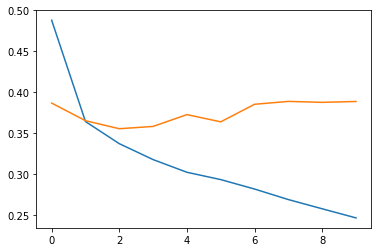

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

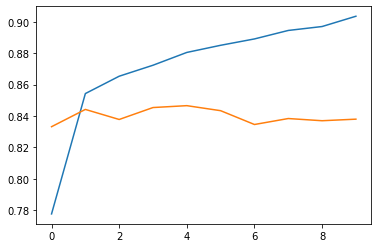

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [0]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.82


과대적합을 해소하기 위해 드랍아웃을 추가한 결과 손실은 약간 감소했지만 정확도는 오히려 떨어졌습니다. 
 
2가지 케이스를 통해 LSTM의 정확도를 올리는데 있어서 과대적합과 층을 쌓는 것으로는 한계가 있다는 것을 알아냈습니다.